# Twitter Sentiment Analysis with Natural Language Processing
by P.Chamisa

In this project, we will be exploring how natural language processing and sentiment analysis can be used to analyze Twitter data and gain insights into people's opinions and emotions about a particular topic or brand.<br/>
The goal of this project is to develop a machine learning model that accurately predicts the sentiment of tweets and visualize the sentiment analysis results using Python libraries. <br/>
We will be using the Tweepy API to collect real-time Twitter data, and NLTK and Pandas libraries to preprocess and analyze the data. Finally, we will deploy the project on an AWS EC2 instance for live streaming of tweets. Let's get started!

## Table of Contents

I. [Data Collection](#data-collection)      
    A. [Twitter API](#twitter-api)  
    B. [Data Pre-processing](#data-pre-processing)  
      1. [Cleaning](#cleaning)  
      2. [Tokenization](#tokenization)  
      3. [Stop words removal](#stop-words-removal)  
      4. [Stemming/Lemmatization](#stemming-lemmatization)                                           
      5. [Lowercasing](#lowercasing)

II. [Exploratory Data Analysis](#exploratory-data-analysis)  
    A. [Data Visualization](#data-visualization)  
       1. [Histogram](#histogram)  
       2. [WordCloud](#wordcloud)  
       3. [Line Graph](#line-graph)  
    B. [Data Insights](#data-insights)  

III. [Sentiment Analysis](#sentiment-analysis)  
     A. [Implementation of Sentiment Analysis](#implementation-of-sentiment-analysis)  
        1. [Training the model](#training-the-model)  
        2. [Testing the model](#testing-the-model)  
        3. [Evaluating the model](#evaluating-the-model)  

IV. [Results](#results)  
    A. [Visualizing the sentiment analysis results](#visualizing-the-sentiment-analysis-results)  
    B. [Interpreting the results](#interpreting-the-results)  
 

V. [Conclusion](#conclusion)  
    A. [Summary of findings](#summary-of-findings)  
    B. [Future work](#future-work)  


### About Dataset
<b> Context </b><br/>
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

<b>Content</b><br/>
It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

In [1]:
# Importing Libraries
# !pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATASET_ENCODING = "ISO-8859-1"
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]

df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.target.unique()

array([0, 4])

The dataset only contains sentiment for positive and negative sentiments only

In [4]:
# Define a lambda function to map the target values to sentiment values
sentiment_mapping = lambda x: 'negative' if x == 0 else 'positive'

# Create a new column 'sentiment' using the apply() function and the lambda function
df['sentiment'] = df['target'].apply(sentiment_mapping)

df.head()

,target,ids,date,flag,user,text,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,negative
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",negative


## <a name=data-pre-processing>Data Pre-processing
    

<a name=cleaning> <b>1. Cleaning</b>

 Remove unnecessary characters such as URLs, mentions, hashtags, punctuations, emojis, and numbers

In [5]:
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)
    # Remove mentions and hashtags
    tweet = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+", "", tweet)
    # Remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # Remove extra whitespaces
    tweet = ' '.join(tweet.split())
    return tweet

df['text'] = df['text'].apply(preprocess_tweet)


In [6]:
# Confirming changes
df.text.sample(4)

76089     grrr code is not working and i dont see why gr...
941232    Sick of normal sambos so having Matzah amp che...
720008                                     might have strep
526046                             My water bill is no joke
Name: text, dtype: object

<a name=tokenization> <b>2. Tokenization</b>

 Splitting the text into individual words (tokens)

In [7]:
# Download the required packages from NLTK
nltk.download('punkt')

# Tokenize the text in the 'text' column of your DataFrame
df['text'] = df['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a name=stop-words-removal> <b>3. Stop Words Removal<b/> <br/>
 
Removing frequently occurring and irrelevant words such as "the", "is", "and", "a", etc.

In [8]:

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """Remove stop words from the text"""
    
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        
        # If all tokens are stopwords, return an empty string
        if not filtered_tokens:
            return ''
        
        filtered_text = " ".join(filtered_tokens)
        return filtered_text

    else:
        return text


# Apply the function to the 'text' column in the DataFrame
df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a name=stemming-lemmatization> <b>4. Stemming/Lemmatization<b/> <br/>
 
Reducing words to their base form to reduce variations of words. Stemming is a simpler method of reducing words to their base form by removing suffixes, while lemmatization is a more sophisticated method of reducing words to their base form by considering the context and part of speech

In [9]:

stemmer = PorterStemmer()

def stem_words(text):
    if isinstance(text, str):  # check if text is a string
        words = nltk.word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in words])
    else:
        return text

df['text'] = df['text'].apply(stem_words)


<a name=lowercasing> <b>5. Lowercasing</b> <br/>

Converting all text to lowercase to reduce the number of unique words.

In [10]:
# Lowercasing the text column
# iterate through each list of words in the 'text' column, and then iterate through each word in the list
#   and convert it to lowercase using the lower() method
df['text'] = [[word.lower() for word in words] for words in df['text']]

In [11]:
df.head()

,target,ids,date,flag,user,text,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[awww, thats, a, bummer, you, shoulda, got, da...",negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[is, upset, that, he, cant, update, his, faceb...",negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[i, dived, many, times, for, the, ball, manage...",negative
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[my, whole, body, feels, itchy, and, like, its...",negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[no, its, not, behaving, at, all, im, mad, why...",negative


## Exploratory Data Analysis

### Data Visualization

<a name=histogram> <b>1. Histogram</b>

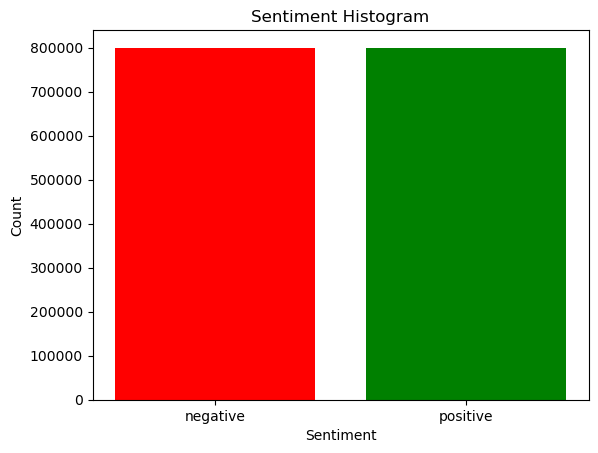

In [12]:
sentiment_counts = df['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green', 'yellow'])
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<a name=wordcloud> <b>2. Word Cloud</b>

In [13]:
df_pos = df[df['sentiment'] == 'positive']
df_neg = df[df['sentiment'] == 'negative']

def generate_wordcloud(df):
    """ A function to generate a word cloud given a dataframe"""
    text = ' '.join(df['text'])
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    

def generate_wordcloud(df):
    """ A function to generate a word cloud given a dataframe"""
    text = ' '.join(df['text'].apply(lambda x: ' '.join(x)))
    wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(text)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

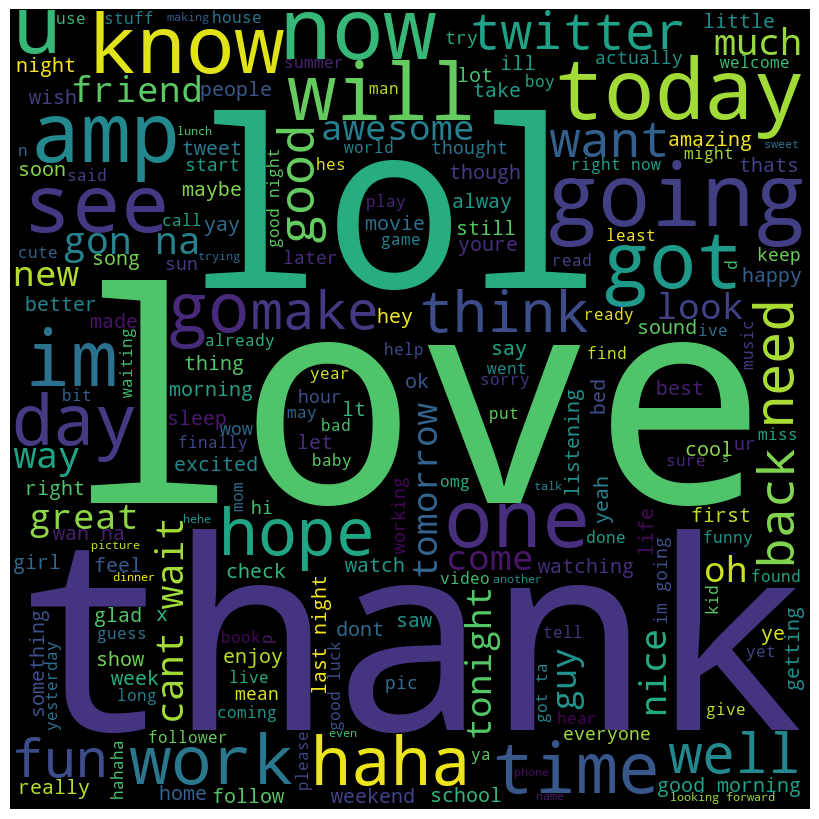

In [14]:
generate_wordcloud(df_pos)

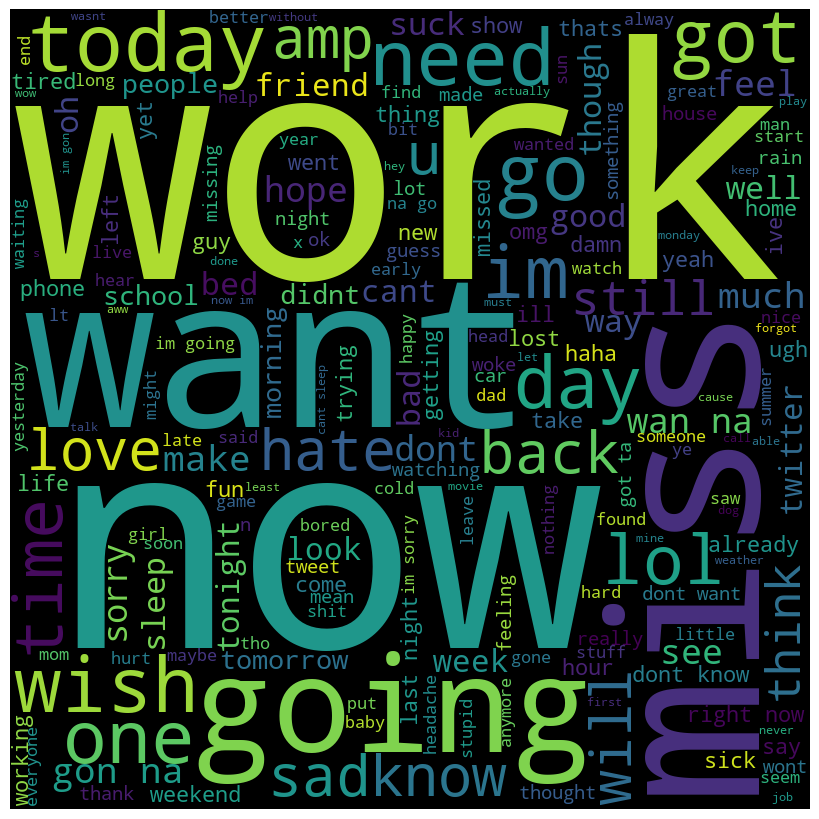

In [15]:
generate_wordcloud(df_neg)


**Time-series analysis** - extracting the date/time from the 'date' column and analyzing the frequency of tweets over time, as well as any patterns or trends.

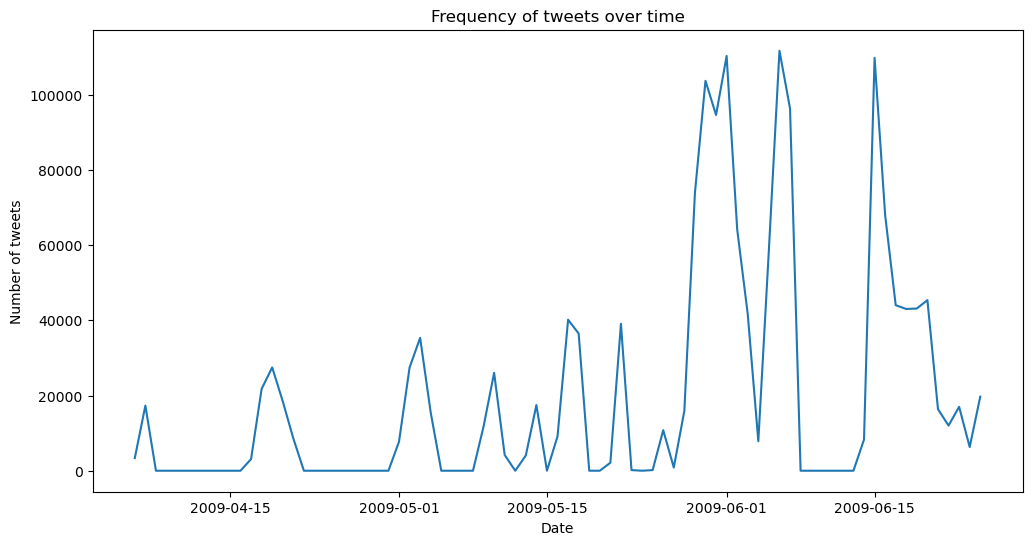

In [16]:
# Convert the 'date' column to a datetime data type
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace=True)

# Resample the data by day and count the number of tweets
tweets_per_day = df['target'].resample('D').count()

# Plot the time-series
plt.figure(figsize=(12,6))
plt.plot(tweets_per_day.index, tweets_per_day.values)
plt.title('Frequency of tweets over time')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()


This code converts the 'date' column to a datetime data type, sets it as the index of the dataframe, resamples the data by day and counts the number of tweets per day, and finally plots the time-series using matplotlib. You can modify the code to resample the data by different time intervals (e.g., hour, week, month), or to analyze other patterns or trends in the data.

<a name=bar-graph>

<a name=data-insights>**Data Insights**

## <a name=sentiment-analysis> Sentiment Analysis

<a name=implementation-of-sentiment-analysis>**Implementation of Sentiment Analysis:**

<a name=implementation-of-sentiment-analysis> 
<a name=training-the-model>  
<a name=testing-the-model> 
<a name=evaluating-the-model>

**Training, Testing and Evaluating the trained models**

In [17]:
df['text'] = [','.join(lst) for lst in df['text']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# In order for xgboost to handle or 0s and 1s
y_train = y_train.replace(4, 1)
y_test = y_test.replace(4, 1)

# Define a list of models to train
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('XGBoost', XGBClassifier())
]

# Loop over the models and train each one on the training set
for name, model in models:
    print(f'Training {name}...')
    # Define a pipeline to vectorize the text data and train the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', model)
    ])
    # Train the model on the training data
    pipeline.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Print the evaluation metrics for the model
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Precision: {precision:.2f}')
    print(f'{name} Recall: {recall:.2f}')
    print(f'{name} F1 Score: {f1:.2f}')


Training Multinomial Naive Bayes...
Multinomial Naive Bayes Accuracy: 0.77
Multinomial Naive Bayes Precision: 0.77
Multinomial Naive Bayes Recall: 0.77
Multinomial Naive Bayes F1 Score: 0.77
Training Logistic Regression...
Logistic Regression Accuracy: 0.80
Logistic Regression Precision: 0.80
Logistic Regression Recall: 0.80
Logistic Regression F1 Score: 0.80
Training XGBoost...
XGBoost Accuracy: 0.76
XGBoost Precision: 0.76
XGBoost Recall: 0.76
XGBoost F1 Score: 0.76


## Results
### Visualising the Sentiment Analysis Results
<a name=results>
<a name=visualising-the-sentiment-results>


Accuracy Scores of the models side by side

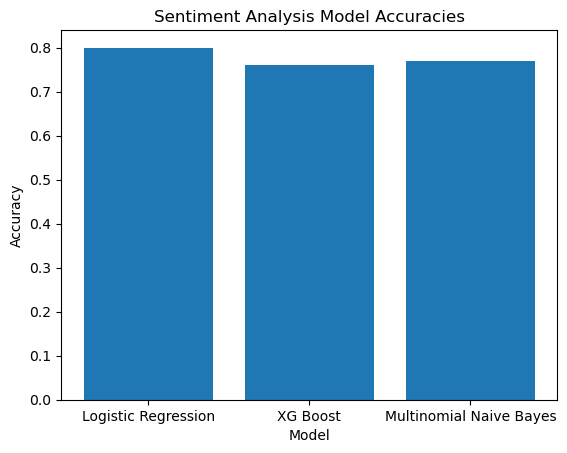

In [18]:
import matplotlib.pyplot as plt

# Create a list of model names and accuracy scores
model_names = ['Logistic Regression', 'XG Boost', 'Multinomial Naive Bayes']
accuracy_scores = [0.80, 0.76, 0.77]

# Create a bar plot
plt.bar(model_names, accuracy_scores)

# Add title and axis labels
plt.title('Sentiment Analysis Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

Intepreting the results


## **Intepreting the results**<a name=interpreting-the-results>

From the results, it appears that the Logistic Regression model performed the best overall, with an accuracy of 0.80, precision of 0.80, recall of 0.80, and F1 score of 0.80.

The Multinomial Naive Bayes model also performed well, with an accuracy of 0.77, precision of 0.78, recall of 0.77, and F1 score of 0.77, while the XGBoost model had slightly lower results, with an accuracy, precision, recall, and F1 score of 0.76.

It's worth noting that all three models had relatively similar results, indicating that the choice of model may not be as critical as other factors such as the quality of the dataset and the specific features used in training the models. However, based on these results, the Logistic Regression model seems to have been the best option for sentiment analysis on Twitter data.

## Conclusion
**Summary of Findings:**

In conclusion, sentiment analysis on Twitter data using machine learning models can achieve high accuracy.Among the models trained in this project, Logistic Regression performed the best with an accuracy of 0.80, while Multinomial Naive Bayes achieved an accuracy of 0.77 and XGBoost achieved an accuracy of 0.76.

Overall, these results indicate that machine learning models can be successfully applied to Twitter sentiment analysis tasks. The results also suggest that choosing an appropriate model can have a significant impact on the performance of sentiment analysis tasks.


**Future Work:**

Based on the findings and limitations of this study, there are several avenues for future research. One potential area for further investigation would be to explore the effectiveness of incorporating additional features, such as user location or tweet hashtags, in order to improve the accuracy of sentiment analysis models. Finally, it would be beneficial to explore the performance of these models on other types of social media data, such as Instagram or Facebook, in order to determine the generalizability of these models to other platforms. Overall, this study provides a solid foundation for future research in the field of sentiment analysis, and suggests several promising directions for further investigation.